**Полина Смольникова**

**Вариант 22**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [7]:
def draw_corr_mat(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

### 1. Дать общую характеристику данным. Проведите первичный анализ данных. При необходимости проведите стандартизацию данных.

In [3]:
df = pd.read_excel('data/21MAG_Exam_Practice_22.xls', 
                   header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,39,1,9400,11,9000,93000
1,33,0,4900,7,4000,42000
2,50,3,14700,16,16000,153000
3,56,4,25500,19,28000,268000
4,50,3,16800,16,18000,175000


**Рассмотрим основные характеристики данных**

In [5]:
df.describe()

,0,1,2,3,4,5
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000
mean,40.000000,1.980000,19992.000000,10.02000,20060.000000,199960.00000
std,8.045787,0.979171,10002.057747,5.02845,10096.291499,100021.82619
min,24.000000,0.000000,1500.000000,0.00000,0.000000,4000.00000
25%,35.000000,1.250000,12600.000000,6.00000,13000.000000,126500.00000
50%,40.000000,2.000000,17900.000000,10.00000,18500.000000,183000.00000
75%,46.000000,2.750000,29075.000000,14.00000,29750.000000,293000.00000
max,56.000000,4.000000,43300.000000,19.00000,44000.000000,437000.00000


**Всего данные содержать 50 строк (50 сэмплов) и размещены в 6-мерном пространстве**

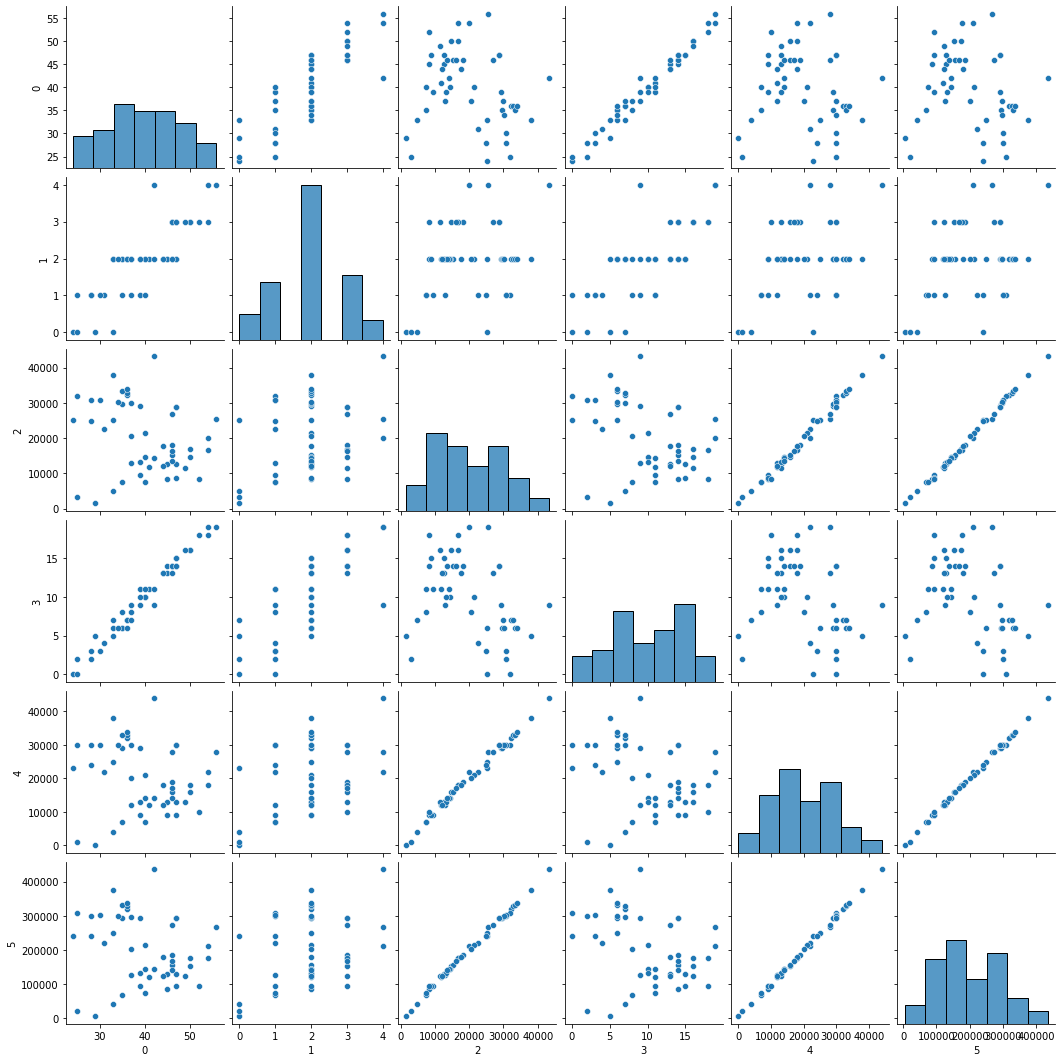

In [6]:
sns.pairplot(df)

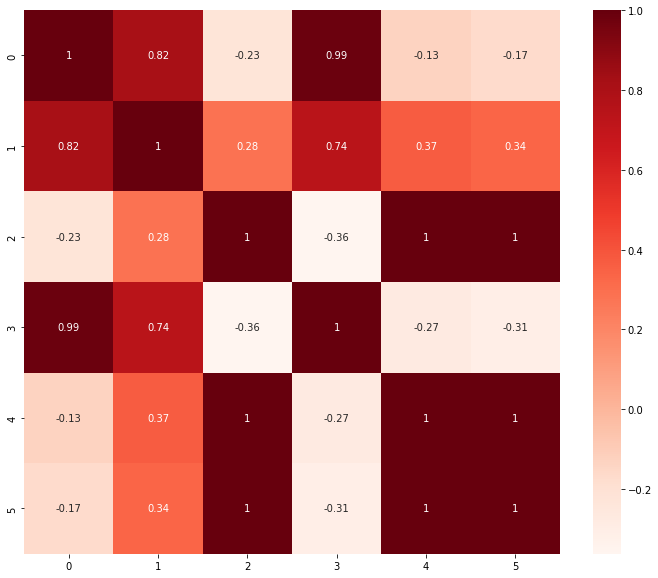

In [8]:
draw_corr_mat(df)

**Из графиков корреляции и попарного распределения данных видно, что некоторые признаки имеют очень высокую корреляцию между собой.**

**Например: corr(0, 3) = 0.99, corr(2, 4) = 1.0, corr(2, 6) = 1.0**

**Из этого можно сделать предположение о возможном успешном вложении данных, представленных в форме 6-мерного вектора в 2-мерное пространство**

### Нормировка данных

In [12]:
df_normalized = df - df.mean(axis=0)
df_normalized = (df_normalized) / np.sqrt(df_normalized.pow(2).sum(axis=0))
df_normalized.describe()

,0,1,2,3,4,5
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.665335e-18,4.996004e-18,2.220446e-18,1.221245e-17,2.775558e-18,-5.551115e-19
std,1.428571e-01,1.428571e-01,1.428571e-01,1.428571e-01,1.428571e-01,1.428571e-01
min,-2.840883e-01,-2.888742e-01,-2.641171e-01,-2.846660e-01,-2.838383e-01,-2.798818e-01
25%,-8.877760e-02,-1.065041e-01,-1.055783e-01,-1.142073e-01,-9.989524e-02,-1.049200e-01
50%,0.000000e+00,2.917921e-03,-2.987957e-02,-5.681956e-04,-2.207317e-02,-2.422328e-02
75%,1.065331e-01,1.123399e-01,1.297304e-01,1.130709e-01,1.371083e-01,1.328853e-01
max,2.840883e-01,2.947100e-01,3.329029e-01,2.551198e-01,3.387382e-01,3.385547e-01


**Проверка: l2 норма = 1 по колонкам**

In [14]:
for norm_value, column_name in zip(np.linalg.norm(df_normalized, axis=0), df_normalized.columns):
    print(f"The L2 Norm for {column_name} = {round(norm_value)}")
    assert round(norm_value) == 1

The L2 Norm for 0 = 1
The L2 Norm for 1 = 1
The L2 Norm for 2 = 1
The L2 Norm for 3 = 1
The L2 Norm for 4 = 1
The L2 Norm for 5 = 1


### 2. Используйте расстояние Чебышева и вычислите матрицу расстояний между объектами. 

In [15]:
dist = DistanceMetric.get_metric('chebyshev')
dist_matrix = dist.pairwise(df_normalized)

In [16]:
dist_matrix

array([[0.        , 0.14589604, 0.29179207, ..., 0.14589604, 0.29713881,
        0.02829893],
       [0.14589604, 0.        , 0.43768811, ..., 0.29179207, 0.43768811,
        0.14589604],
       [0.29179207, 0.43768811, 0.        , ..., 0.14589604, 0.19995885,
        0.29179207],
       ...,
       [0.14589604, 0.29179207, 0.14589604, ..., 0.        , 0.25469041,
        0.14589604],
       [0.29713881, 0.43768811, 0.19995885, ..., 0.25469041, 0.        ,
        0.32543774],
       [0.02829893, 0.14589604, 0.29179207, ..., 0.14589604, 0.32543774,
        0.        ]])

### 3. Проверьте, можно ли объекты с полученной матрицей расстояний  поместить в некоторое евклидово пространство с сохранением расстояний между объектами (т.е. так чтобы евклидовы расстояния между точками этого пространства были равны расстояниям Чебышева между исходными объектами).

**Проверим, что матрица $B=-\frac{1}{2}(I_n - \frac{1}{n}J_n)D^2(I_n - \frac{1}{n}J_n)$ неотрицательна определена**

**Это будет свидетельствовать о возможном вложении 6-мерных объектов, описанных с помощью матрицы расстояний (расстояние Чебышева), в 6-мерное Евклидово пространство**

In [31]:
n = len(df_normalized.columns)
dist_matrix_squared = np.zeros((n, n))


for i in range(n):
    for j in range(n):
        dist_matrix_squared[i,j] = dist_matrix[i,j] * dist_matrix[i,j]
        
B = -1/2 * (np.eye(n) - 1/n * np.ones(n)) @ dist_matrix_squared @ (np.eye(n) - 1/n * np.ones(n))

print("B:\n", B)

check = np.all((np.linalg.eigvals(B)).round(3)) >= 0.0
print("B is non-negative definite", check)

B:
 [[ 0.03454903  0.05795357 -0.01756425 -0.04378294 -0.01847142 -0.01268398]
 [ 0.05795357  0.10264376 -0.03673102 -0.08423536 -0.03763819 -0.00199275]
 [-0.01756425 -0.03673102  0.01546508  0.0280456   0.01406425 -0.00327966]
 [-0.04378294 -0.08423536  0.0280456   0.06945598  0.03091053 -0.00039381]
 [-0.01847142 -0.03763819  0.01406425  0.03091053  0.01365074 -0.00251591]
 [-0.01268398 -0.00199275 -0.00327966 -0.00039381 -0.00251591  0.02086611]]
B is non-negative definite True


**Матрица B неотрицательна определена**

### 4. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. 

**Используем реализацию MDS из sklearn.manifold**

In [19]:
model = MDS(n_components=2, 
            metric=True, 
            n_init=4, 
            max_iter=300, 
            verbose=0, 
            eps=0.001, 
            n_jobs=None, 
            random_state=42, 
            dissimilarity='precomputed')
    
df_mds_2d = model.fit_transform(dist_matrix)

print('The new shape of X: ',df_mds_2d.shape)


The new shape of X:  (50, 2)


### 5. Оцените погрешность такого размещения. Постройте карту клиентов.

In [20]:
print('Stress: ', model.stress_)

Stress:  0.5932516518997193


**Построим карту клентов**

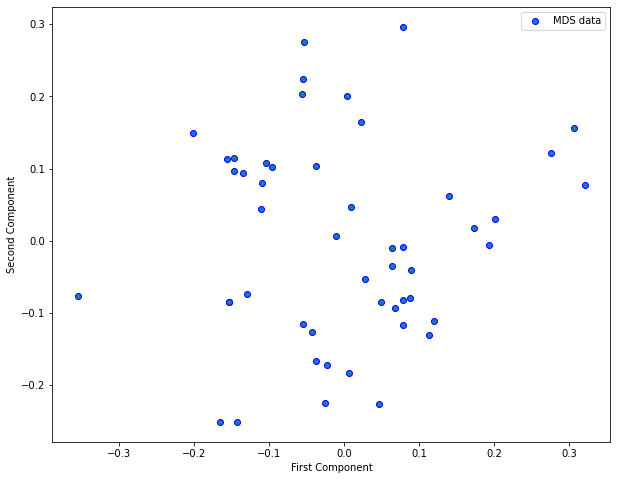

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(df_mds_2d[:, 0], df_mds_2d[:, 1], label='MDS data', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.show()

### 6. Дайте комментарий к карте объектов

**Попробуем проанализировать полученную с помощью MDS карту клиентов, использую k-means кластеризацию**

**Найдем оптимальное число кластеров**

Чтобы найти оптимальное число кластеров, воспользуемся методом локтя. В основе его лежит подсчет inertia, которая является суммой расстояний от точек до центра кластера.

$$\sum_{i=1}^N(x_i - C_k)^2$$

Суть метода локтя заключается в том, что мы строим графики убывания inertia в заисимости от количества кластеров и берем за оптимальное значение такое, при котором произошло последнее сильное уменьшение inertia. Или по другому, которая лежит на "изгибе локтя" графика

In [26]:
def scree_plot(df, title):
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k).fit(df)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 10), inertia, marker='s');
    plt.xlabel('Number of clusters')
    plt.ylabel('Compactness')
    plt.title('Scree plot of ' + title)
    plt.show()

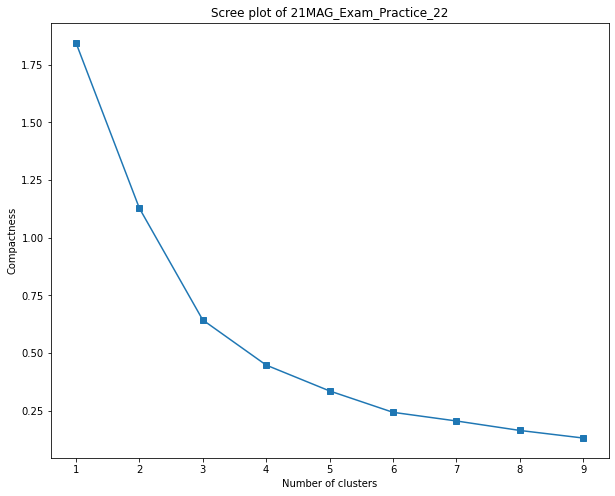

In [27]:
scree_plot(df_mds_2d, '21MAG_Exam_Practice_22')

**По методу локтя - оптимальное число кластеров 4**

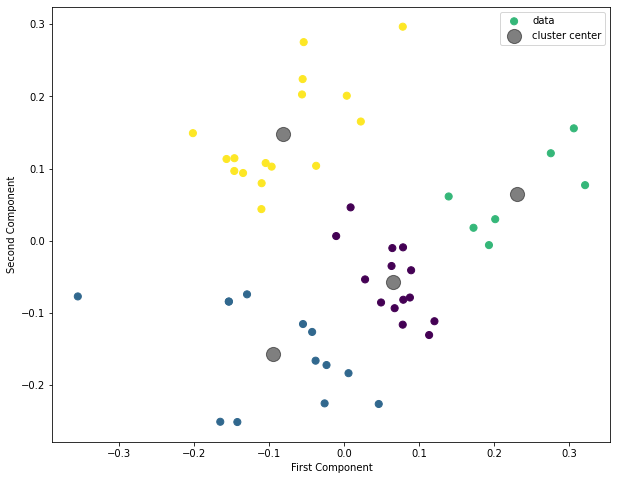

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_mds_2d)
y_kmeans = kmeans.predict(df_mds_2d)
plt.figure(figsize=(10,8))
plt.scatter(df_mds_2d[:, 0], df_mds_2d[:, 1], c=y_kmeans, s=50, cmap='viridis',
            label='data')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,
           label='cluster center')
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.legend(loc='upper right')

**Видны четкие границы кластеров.**

**Рассмотрим структуру новой матрицы корреляции**

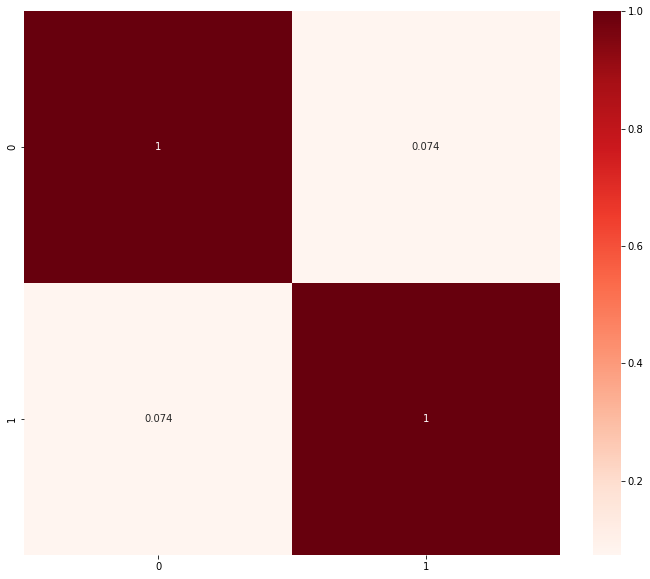

In [41]:
draw_corr_mat(pd.DataFrame(df_mds_2d))

**Структурно матрица корреляции стала лучше (признаки имеют очень слабую зависимость между собой)**

**Рассмотрим какие данные попали в один кластер на примере 0 кластера**

In [44]:
for i, y in enumerate(y_kmeans):
    if y == 0:
        display(df.iloc[i])

0        46
1         2
2     15200
3        14
4     16000
5    156000
Name: 11, dtype: int64

0        40
1         2
2     14500
3        10
4     14000
5    144000
Name: 12, dtype: int64

0        47
1         2
2     12600
3        15
4     13000
5    130000
Name: 13, dtype: int64

0       45
1        2
2     8300
3       14
4     9000
5    86000
Name: 14, dtype: int64

0       47
1        2
2     8800
3       15
4     9000
5    92000
Name: 20, dtype: int64

0        44
1         2
2     17700
3        13
4     18000
5    180000
Name: 24, dtype: int64

0        41
1         2
2     11900
3        11
4     12000
5    119000
Name: 26, dtype: int64

0        45
1         2
2     12600
3        13
4     13000
5    128000
Name: 29, dtype: int64

0        40
1         2
2     21400
3        10
4     21000
5    214000
Name: 31, dtype: int64

0        42
1         2
2     14200
3        11
4     14000
5    143000
Name: 37, dtype: int64

0        37
1         2
2     20500
3         8
4     20000
5    202000
Name: 39, dtype: int64

0        39
1         2
2     13200
3        10
4     13000
5    131000
Name: 41, dtype: int64

0        46
1         2
2     13600
3        14
4     14000
5    139000
Name: 42, dtype: int64

0        44
1         2
2     12100
3        13
4     12000
5    123000
Name: 47, dtype: int64

**Видно, что сэмплы, попавшие в 0 кластер очень похожи между собой. При более подробной информации о данных, можно было бы дать интерпретацию текущей кластеризации**